# Part 1 Introduction of the project:
project source: https://www.kaggle.com/datasets/jinbonnie/chicago-airbnb-open-data

Airbnb has been a trending product that people use to book living and it is a good substitute of other hotel booking websites. 

This dataset including the Chicago airbnb information about the hosts, the information about the position of the Airbnb( neighborhood, latitude, longitude) which can use for map plot, describe of the room, and price, etc. Which will be a good dataset for data visualization and prediction. This public dataset is part of Airbnb, and the original source can be found from Airbnb Open Data.

The main question I want to explore in this project: 
What factors influence the price and which model performs the best in price prediction?



## Variable Definition:
### Numerical:
latitude - The latitude of the position

longitude - The longitude of the position

price - The price of the apartment(per day)

minimum_nights - The least nights you need to book

numberofreviews - The total number of the reviews on this dataset

reviewspermonth - How many reviews the airbnb can receive per month

calculatedhostlistings_count - The total listing number of the host

availability_365 - The available days

id - The id of the airbnb

host_id - The id of the host


### Categorical:

neighborhood - Which area is the airbnb belongs to

room_type - Entire home/apt, Private room or Other


### Text:
name - The name of the airbnb

host_name - The name of the host

### Date:
last_review - the last review time

### Vacant:
neighbourhood_group 


# Part 2 Data Exploration:


In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

import sklearn.preprocessing
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import tree
import graphviz
from sklearn.ensemble import RandomForestClassifier


import re
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_csv('/Users/yuchenzhou/Desktop/MachineLearning/final_project/listings.csv')
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,NaN,Hyde Park,41.78790,-87.58780,Private room,60,2,178,2019-12-15,2.56,1,353
1,4505,394 Great Reviews. 127 y/o House. 40 yds to tr...,5775,Craig & Kathleen,NaN,South Lawndale,41.85495,-87.69696,Entire home/apt,105,2,395,2020-07-14,2.81,1,155
2,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.90289,-87.68182,Entire home/apt,60,2,384,2020-03-08,2.81,1,321
3,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,NaN,Lincoln Park,41.91769,-87.63788,Entire home/apt,65,4,49,2019-10-23,0.63,9,300
4,10610,3 Comforts of Cooperative Living,2140,Lois,NaN,Hyde Park,41.79612,-87.59261,Private room,21,1,44,2020-02-14,0.61,5,168


In [3]:
data.shape 

(6397, 16)

In [4]:
# check missing values
data.isna().sum(axis=0)

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               6397
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1132
reviews_per_month                 1132
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [5]:
# check feature types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6397 entries, 0 to 6396
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6397 non-null   int64  
 1   name                            6397 non-null   object 
 2   host_id                         6397 non-null   int64  
 3   host_name                       6397 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6397 non-null   object 
 6   latitude                        6397 non-null   float64
 7   longitude                       6397 non-null   float64
 8   room_type                       6397 non-null   object 
 9   price                           6397 non-null   int64  
 10  minimum_nights                  6397 non-null   int64  
 11  number_of_reviews               6397 non-null   int64  
 12  last_review                     52

### 2.1 Numerical Features
I checked the distribution of numerical variables and see if there are any outliers. 

#### 1) price

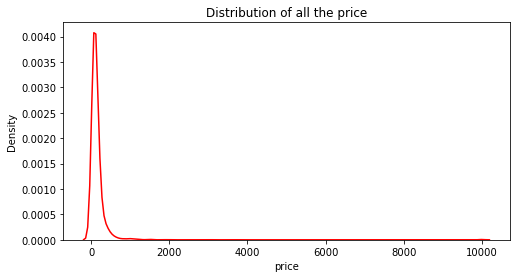

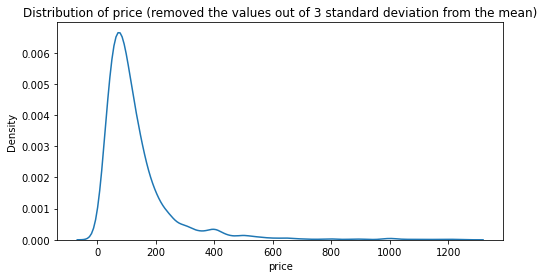

In [6]:
# show all the disribution of values
fig = plt.figure(figsize=(8,4))
sns.kdeplot(data['price'],color = 'r')
plt.title('Distribution of all the price')
plt.show()

# remove the outliers
def three_sigma(ser):
    rule = (ser.mean() - 3*ser.std() > ser) | (ser.mean() + 3*ser.std() < ser)
    fig = plt.figure(figsize=(8,4))
    sns.kdeplot(ser[-rule])
    plt.title('Distribution of price (removed the values out of 3 standard deviation from the mean)')
    plt.show()


three_sigma(data['price'])

After removing the data whose price lies 3 standard deviation away from the mean, the data is still right skewed, so I decide to drop rows whose price >=200 or <=0. 

In [7]:
#ser_price = data['price']
#rule_price = (ser_price.mean() - 3*ser_price.std() > ser_price) | (ser_price.mean() + 3*ser_price.std() < ser_price)


index_1 = data[data['price']>=200].index.tolist()
index_2 = data[data['price'] <=0].index.tolist()
for a in index_1:
    data = data.drop(index=a)

for a in index_2:
    data = data.drop(index=a)
data.shape


(5350, 16)

To make the price approach normal distribution, I dropped many values that distribute at the long right tail, and this sacrifice the sample size, especially the overall sample size in the modeling process. But this improves the model performance and made the predicted prices closer to the true prices.

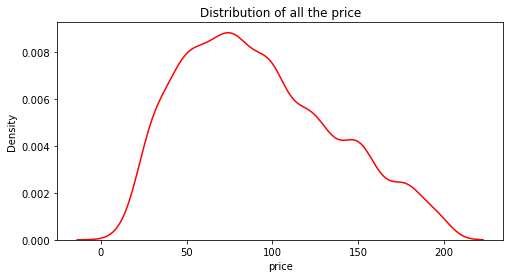

In [8]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(data['price'],color = 'r')
plt.title('Distribution of all the price')
plt.show()

#### 2) minimum nights

In [9]:
# x2 = data['minimum_nights']
# x2.plot.box(title = 'boxplot of min_nights')
# plt.show()

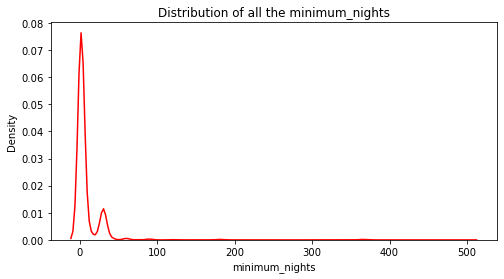

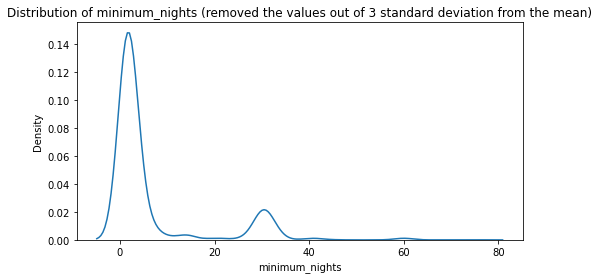

In [10]:
# show all the disribution of values
fig = plt.figure(figsize=(8,4))
sns.kdeplot(data['minimum_nights'],color = 'r')
plt.title('Distribution of all the minimum_nights')
plt.show()

# remove the outliers
def three_sigma(ser):
    rule = (ser.mean() - 3*ser.std() > ser) | (ser.mean() + 3*ser.std() < ser)
    fig = plt.figure(figsize=(8,4))
    sns.kdeplot(ser[-rule])
    plt.title('Distribution of minimum_nights (removed the values out of 3 standard deviation from the mean)')
    plt.show()


three_sigma(data['minimum_nights'])

It looks like that records of minimum nights >= 20 and minimum_nights <0 are far from the distribution, so I delete them.

In [11]:
index_3 = data[data['minimum_nights'] >= 20].index.tolist()
index_4 = data[data['minimum_nights'] <= 0].index.tolist()
for a in index_3:
    data = data.drop(index=a)
    
for a in index_4:
    data = data.drop(index=a)
data.shape

(4537, 16)

#### 3) number of reviews

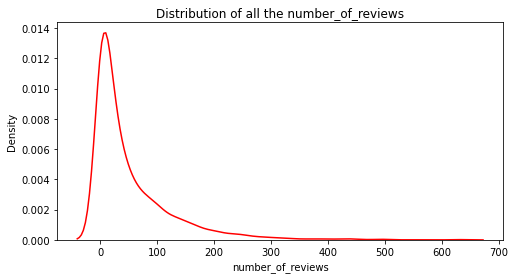

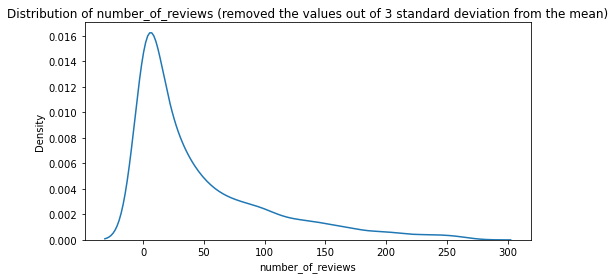

In [12]:
# show all the disribution of values
fig = plt.figure(figsize=(8,4))
sns.kdeplot(data['number_of_reviews'],color = 'r')
plt.title('Distribution of all the number_of_reviews')
plt.show()

# remove the outliers
def three_sigma(ser):
    rule = (ser.mean() - 3*ser.std() > ser) | (ser.mean() + 3*ser.std() < ser)
    fig = plt.figure(figsize=(8,4))
    sns.kdeplot(ser[-rule])
    plt.title('Distribution of number_of_reviews (removed the values out of 3 standard deviation from the mean)')
    plt.show()


three_sigma(data['number_of_reviews'])

Although the data is right skewed, the right tail is not too long. So I decide to not to delete any rows in terms of number of reviews. 

#### 4）reviews per month 

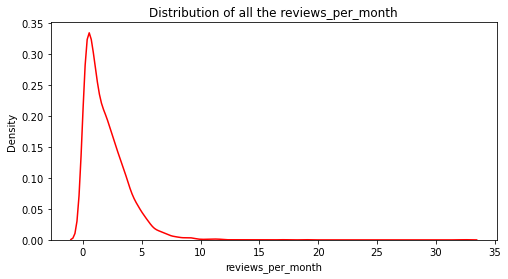

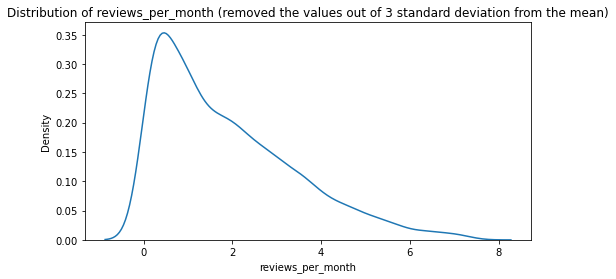

In [13]:
# show all the disribution of values
fig = plt.figure(figsize=(8,4))
sns.kdeplot(data['reviews_per_month'],color = 'r')
plt.title('Distribution of all the reviews_per_month')
plt.show()

# remove the outliers
def three_sigma(ser):
    rule = (ser.mean() - 3*ser.std() > ser) | (ser.mean() + 3*ser.std() < ser)
    fig = plt.figure(figsize=(8,4))
    sns.kdeplot(ser[-rule])
    plt.title('Distribution of reviews_per_month (removed the values out of 3 standard deviation from the mean)')
    plt.show()


three_sigma(data['reviews_per_month'])

Although the data is right skewed, the right tail is not too long. So I decide to not to delete any rows in terms of reviews per month. 

#### 5) calculated_host_listings_count

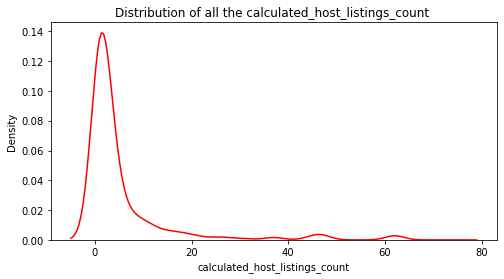

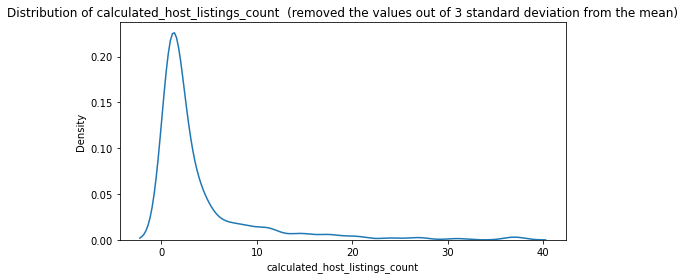

In [14]:
# show all the disribution of values
fig = plt.figure(figsize=(8,4))
sns.kdeplot(data['calculated_host_listings_count'],color='r')
plt.title('Distribution of all the calculated_host_listings_count ')
plt.show()

# remove the outliers
def three_sigma(ser):
    rule = (ser.mean() - 3*ser.std() > ser) | (ser.mean() + 3*ser.std() < ser)
    fig = plt.figure(figsize=(8,4))
    sns.kdeplot(ser[-rule])
    plt.title('Distribution of calculated_host_listings_count  (removed the values out of 3 standard deviation from the mean)')
    plt.show()


three_sigma(data['calculated_host_listings_count'])

After removing the outliers which are 3 standard deviation away from the mean, the data is still right skewed. So that I decide to move the tail part, which is calculated_host_listings_count > 20

In [15]:
index_8 = data[data['calculated_host_listings_count'] > 20].index.tolist()

for a in index_8:
    data = data.drop(index=a)
data.shape

(4255, 16)

#### 6) availability_365

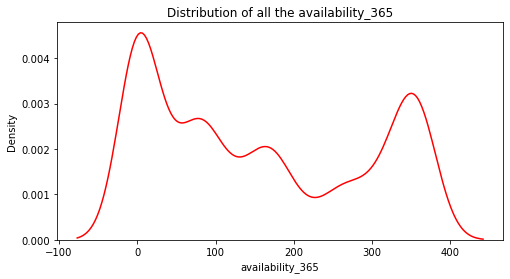

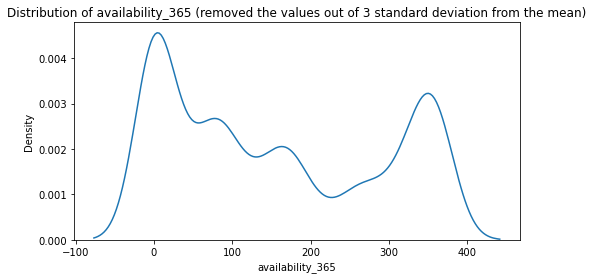

In [16]:
# show all the disribution of values
fig = plt.figure(figsize=(8,4))
sns.kdeplot(data['availability_365'],color='r')
plt.title('Distribution of all the availability_365')
plt.show()

# remove the outliers
def three_sigma(ser):
    rule = (ser.mean() - 3*ser.std() > ser) | (ser.mean() + 3*ser.std() < ser)
    fig = plt.figure(figsize=(8,4))
    sns.kdeplot(ser[-rule])
    plt.title('Distribution of availability_365 (removed the values out of 3 standard deviation from the mean)')
    plt.show()


three_sigma(data['availability_365'])

After seeing the distribution of availability 365 whose outliers has been removed, it is not a normal distribution, however, there are no obvious outliers. So I decide not to drop any rows.

### 2.2 Features that contains no meaning. 
Next I saw the distribution of categorical variables = id, host_id, host_name

#### 1) id

In [17]:
df_id = data.copy()
plot_data_id = df_id.groupby('id')['id'].agg(['count']).reset_index()
plot_data_id.shape

(4255, 2)

There are too many counts of id (6009) and it does not have any exact meanings, so I will drop it later. 

#### 2) host_id

In [18]:
df_hostid = data.copy()
plot_data_hostid = df_hostid.groupby('host_id')['host_id'].agg(['count']).reset_index()
plot_data_hostid.shape

(2834, 2)

The same thing happends for host id (3370 counts) and since the ids does not have meanings if I explore the features which are correlated with room price. So I will drop this variable later. 

#### 3) host_name

In [19]:
df_hostname = data.copy()
plot_data_hostname = df_hostname.groupby('host_name')['host_name'].agg(['count']).reset_index()
plot_data_hostname.shape

(1600, 2)

Since host name also does not contain any exact meaning if we want to predict the room price, and there are still too many different values inside (1817 counts), I will drop this variable later. 

In [20]:
data=data.drop(columns=['id','host_id','host_name','neighbourhood_group'])

### 2.3 Categorical features
Next I will see the distribution of the categorical features - neighbourhood and room type. 
#### 1) neighbourhood

In [21]:
df_nb = data.copy()

plot_data_nb = df_nb.groupby('neighbourhood')['neighbourhood'].agg(['count']).reset_index()
plot_data_nb.shape


(77, 2)

We can see that there are 77 types of neighbourhood, and we will encode them in the data processing part. 

#### 2) Room type

Then we plotted the distribution of room type.

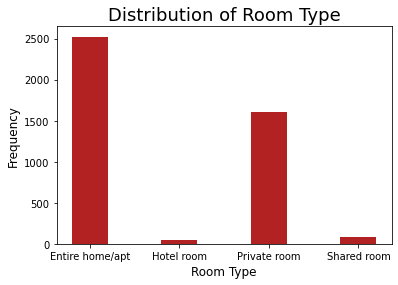

In [22]:
df_room = data.copy()
plot_data = df_room.groupby('room_type')['room_type'].agg(['count']).reset_index()
plt.bar(plot_data['room_type'], plot_data['count'], color ='firebrick',
        width = 0.4)
 
plt.xlabel("Room Type",fontsize = 12)
plt.ylabel("Frequency",fontsize = 12)
plt.title("Distribution of Room Type",fontsize = 18)
plt.show()


There are four types of rooms in the data set. Most of them are entire home, follows by private room.

####  Now check the data set again. 

In [23]:
data.head()

,name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,"Hyde Park - Walk to UChicago, 10 min to McCormick",Hyde Park,41.78790,-87.58780,Private room,60,2,178,2019-12-15,2.56,1,353
1,394 Great Reviews. 127 y/o House. 40 yds to tr...,South Lawndale,41.85495,-87.69696,Entire home/apt,105,2,395,2020-07-14,2.81,1,155
2,Tiny Studio Apartment 94 Walk Score,West Town,41.90289,-87.68182,Entire home/apt,60,2,384,2020-03-08,2.81,1,321
3,Barbara's Hideaway - Old Town,Lincoln Park,41.91769,-87.63788,Entire home/apt,65,4,49,2019-10-23,0.63,9,300
4,3 Comforts of Cooperative Living,Hyde Park,41.79612,-87.59261,Private room,21,1,44,2020-02-14,0.61,5,168


In [24]:
# check the missing values
data.isna().sum(axis=0)

name                                0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
last_review                       453
reviews_per_month                 453
calculated_host_listings_count      0
availability_365                    0
dtype: int64

In [25]:
data.shape

(4255, 12)

### Data exploration conclusion: 
1) From the above exploration we found that there are 6397 rows and 16 columns in the original data sample. 

2) I drop the outliers whose value are 3 standard deviation away from the mean. 

3) 'neighbourhood_group' contains no values at all so that is is not a useful variable, I drop it. 

4) 'last_review' and 'reviews_per_month'  both contain 587 null variables, roughly 11.7% (587/5021) of the sample size.  

5) Since both id and host_id have two many categories and they do not actually contain any exact meanings, I decide to drop them. 


#### Till now, we have 11 features left in the dataset, and price is the target variable. 

#### 1) categorical features: 
neighbourhood, room_type 
#### 2) numerical features: 
latitude, longitude, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365
#### 3) text feature: 
name
#### 4) date:
last_review




## 2.3 Correlation Exploration

In [26]:
# class features
categorical_features = ['neighbourhood','room_type']
numerical_features = ['latitude','longitude','minimum_nights','number_of_reviews','price',
    'calculated_host_listings_count','availability_365']
text_features = ['name']
date_features = ['last_review']

### 2.3.1 Bivariate Analysis of Numerical Features

In [27]:
# transform categorical attributes for correlation
data_cor = data.copy()
for feature in categorical_features:
    le = LabelEncoder()
    le.fit(data_cor[feature])
    data_cor[feature] = le.transform(data_cor[feature])

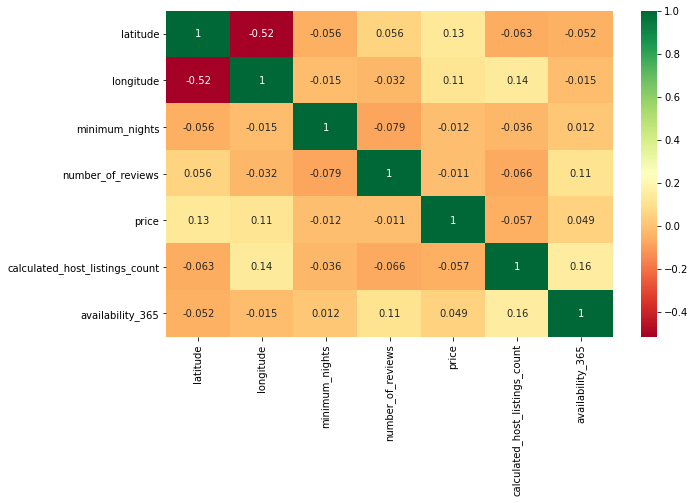

In [28]:
plt.figure(figsize=(10, 6))
corr_mat = data_cor[numerical_features].corr()
sns.heatmap(round(corr_mat, 3),annot=True, cmap='RdYlGn')
plt.show()

#### From the results we can see longitude and latitude have high correlation, which make sense since both of them indicate a location. 

### 2.3.2 Bivariate Analysis of Categorical Features

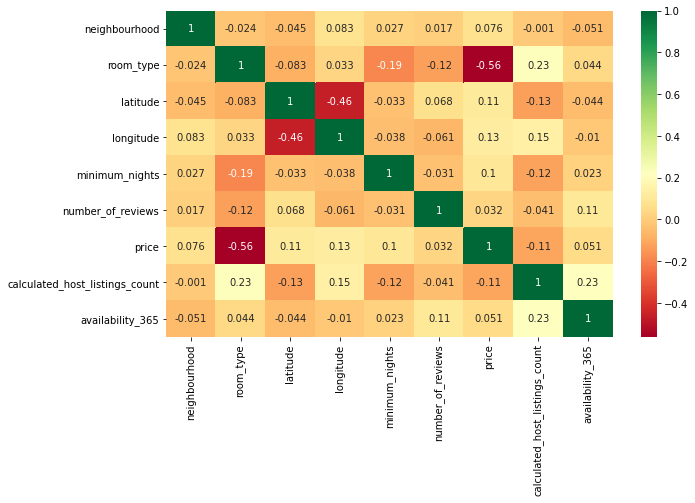

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(round(data_cor[categorical_features + numerical_features + date_features].corr(method='spearman'), 3), 
            annot=True,mask=None, cmap='RdYlGn')
plt.show()

#### price and room_type are highly correlated, but since price is the target variable so this strong correlation will not lead to multicollinearity issues.


## 2.2 Drop/Impute the Missing Variables


As for last_review, which is a date, it is hard to fill in the missing values by using prediction from other variables. It also makes no sense to fill the null values by mean, min, or max. Since the missing values occupy 17% of sample size in this variable, I decide to drop last_review. 

In [30]:
data=data.drop(columns=['last_review'])
data.head()

,name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,"Hyde Park - Walk to UChicago, 10 min to McCormick",Hyde Park,41.78790,-87.58780,Private room,60,2,178,2.56,1,353
1,394 Great Reviews. 127 y/o House. 40 yds to tr...,South Lawndale,41.85495,-87.69696,Entire home/apt,105,2,395,2.81,1,155
2,Tiny Studio Apartment 94 Walk Score,West Town,41.90289,-87.68182,Entire home/apt,60,2,384,2.81,1,321
3,Barbara's Hideaway - Old Town,Lincoln Park,41.91769,-87.63788,Entire home/apt,65,4,49,0.63,9,300
4,3 Comforts of Cooperative Living,Hyde Park,41.79612,-87.59261,Private room,21,1,44,0.61,5,168


As for number_of_reviews, I filled the null by using the mean value.

In [31]:
# fill the missing values of number_of_reviews

fam = data['reviews_per_month'].values.reshape(-1,1)
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit_transform(fam)
fam_result = pd.DataFrame(imp.fit_transform(fam),columns=['reviews_per_month'])
data = data.reset_index()
fam_result = fam_result.reset_index()
data = pd.concat([data,fam_result],axis=1)
data = data.drop(columns=['reviews_per_month'])
data.head()



,index,name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,index
0,0,"Hyde Park - Walk to UChicago, 10 min to McCormick",Hyde Park,41.78790,-87.58780,Private room,60,2,178,1,353,0
1,1,394 Great Reviews. 127 y/o House. 40 yds to tr...,South Lawndale,41.85495,-87.69696,Entire home/apt,105,2,395,1,155,1
2,2,Tiny Studio Apartment 94 Walk Score,West Town,41.90289,-87.68182,Entire home/apt,60,2,384,1,321,2
3,3,Barbara's Hideaway - Old Town,Lincoln Park,41.91769,-87.63788,Entire home/apt,65,4,49,9,300,3
4,4,3 Comforts of Cooperative Living,Hyde Park,41.79612,-87.59261,Private room,21,1,44,5,168,4


In [32]:
data.isna().sum(axis=0)

index                             0
name                              0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
index                             0
dtype: int64

Now the data set has no missing values.

# Part 3 Data Processing

### Feature space
Now there are 10 features in the data set, which include 1 text feature, 2 categorical features, and 7 numerical features. 

As for the text feature, it is name.

As for the categorical features, they include:
neighbourhood, room_type

As for numeric features, they include:
latitude, longitude, price, minimum_nights, number_of_reviews, calculated_host_listings_count, availability_365

###  2.1 Process categorical features:
#### neighbourhood, room_type

In [33]:
# class features
categorical_features = ['neighbourhood','room_type']
numerical_features = ['latitude','longitude','minimum_nights','number_of_reviews','price'
    'calculated_host_listings_count','availability_365']
text_features = ['name']


In [34]:
#create dummy variables
loc_classDf = pd.get_dummies(data['neighbourhood'],prefix = 'loc') 
# add the dummy variables into the table
data = pd.concat([data,loc_classDf],axis=1)
data=data.drop(columns=['neighbourhood'])
data.head()

,index,name,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,...,loc_Washington Heights,loc_Washington Park,loc_West Elsdon,loc_West Englewood,loc_West Garfield Park,loc_West Lawn,loc_West Pullman,loc_West Ridge,loc_West Town,loc_Woodlawn
0,0,"Hyde Park - Walk to UChicago, 10 min to McCormick",41.78790,-87.58780,Private room,60,2,178,1,353,...,0,0,0,0,0,0,0,0,0,0
1,1,394 Great Reviews. 127 y/o House. 40 yds to tr...,41.85495,-87.69696,Entire home/apt,105,2,395,1,155,...,0,0,0,0,0,0,0,0,0,0
2,2,Tiny Studio Apartment 94 Walk Score,41.90289,-87.68182,Entire home/apt,60,2,384,1,321,...,0,0,0,0,0,0,0,0,1,0
3,3,Barbara's Hideaway - Old Town,41.91769,-87.63788,Entire home/apt,65,4,49,9,300,...,0,0,0,0,0,0,0,0,0,0
4,4,3 Comforts of Cooperative Living,41.79612,-87.59261,Private room,21,1,44,5,168,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#create dummy variables
room_classDf = pd.get_dummies(data['room_type'],prefix = 'room') 
# add the dummy variables into the table
data = pd.concat([data,room_classDf],axis=1)
data=data.drop(columns=['room_type'])
data = data.drop(columns = 'index')
data.head()


,name,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,loc_Albany Park,loc_Archer Heights,...,loc_West Garfield Park,loc_West Lawn,loc_West Pullman,loc_West Ridge,loc_West Town,loc_Woodlawn,room_Entire home/apt,room_Hotel room,room_Private room,room_Shared room
0,"Hyde Park - Walk to UChicago, 10 min to McCormick",41.78790,-87.58780,60,2,178,1,353,0,0,...,0,0,0,0,0,0,0,0,1,0
1,394 Great Reviews. 127 y/o House. 40 yds to tr...,41.85495,-87.69696,105,2,395,1,155,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Tiny Studio Apartment 94 Walk Score,41.90289,-87.68182,60,2,384,1,321,0,0,...,0,0,0,0,1,0,1,0,0,0
3,Barbara's Hideaway - Old Town,41.91769,-87.63788,65,4,49,9,300,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3 Comforts of Cooperative Living,41.79612,-87.59261,21,1,44,5,168,0,0,...,0,0,0,0,0,0,0,0,1,0


### 2.2 Process numerical features:
#### Numerical features include: latitude, longitude, price, minimum_nights, number_of_reviews, calculated_host_listings_count, availability_365

Since there are no missing values in these numerical variables, we do not do any data processing and will rescale them later. 

### 2.3 Process the text feature (name):

In [36]:
stop_words = ['to','with','w','of','&','and','-','the','off','1','2','3','4','5','6',
             '7','8','9','10','11','12','13','14','15','16','17','18','20','21','1st',
              'you','your','zen','zencity','zoo','ｏｆｆ','price','40','from','أهلا']

I set the min_df as 100 and want to include the words only appear over 100 times.

In [37]:
ct_vec = CountVectorizer(stop_words=stop_words,min_df = 100) 

# Learn the vocabulary dictionary and return document-term matrix
X = ct_vec.fit_transform(list(data['name'])) 

words_df = pd.DataFrame(X.toarray()).rename(columns={i: w 
                              for w,i in ct_vec.vocabulary_.items()})

words_df.head()

,2br,apartment,apt,bath,beautiful,bed,bedroom,charming,chicago,clean,...,room,spacious,square,studio,suite,village,walk,west,wicker,wrigley
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we have selected words that appear at least 100 times. There are 484 words selected. 

In [38]:
data = pd.concat([data,words_df],axis=1)
data = data.drop(columns='name')
data.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,loc_Albany Park,loc_Archer Heights,loc_Armour Square,...,room,spacious,square,studio,suite,village,walk,west,wicker,wrigley
0,41.78790,-87.58780,60,2,178,1,353,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,41.85495,-87.69696,105,2,395,1,155,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,41.90289,-87.68182,60,2,384,1,321,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,41.91769,-87.63788,65,4,49,9,300,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,41.79612,-87.59261,21,1,44,5,168,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Part 4 Rescale the data and split train-test data set

####  I split the train and test data set. I had 30% as the test set and set random_state as 42.

In [39]:
from sklearn.model_selection import train_test_split

a = list(data.columns.values)
a.pop(2)

X = data[a] # X is all the features except for 'price'
y = data['price'] # y is 'price'

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,  # I want to have 30% as test set. 
                                                random_state=42)
X_train.shape, X_test.shape

((2978, 130), (1277, 130))

#### To rescale the data, I use StandardScaler.

In [40]:
#scale the numerical variables but not the target variable 'price'. 
X_train_num = X_train[['latitude','longitude','minimum_nights','number_of_reviews',
                 'calculated_host_listings_count','availability_365']] 
X_train_num
X_test_num = X_test[['latitude','longitude','minimum_nights','number_of_reviews',
                 'calculated_host_listings_count','availability_365']] 
X_test_num

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
184,41.94177,-87.65147,2,0,2,88
1018,41.94872,-87.65189,1,61,1,178
2909,41.80133,-87.58495,2,6,1,41
2704,41.91190,-87.63854,4,23,9,323
602,41.85523,-87.67427,2,48,1,301
...,...,...,...,...,...,...
1550,41.95061,-87.67199,6,110,1,21
1767,41.82011,-87.62129,1,28,3,364
2643,41.76458,-87.57169,3,15,7,338
3603,42.00750,-87.66123,1,16,1,168


In [41]:
std_scaler = StandardScaler()

X_train_std = std_scaler.fit_transform(X_train_num)
X_test_std = std_scaler.transform(X_test_num)
print(X_train_std[:3])
print(X_test_std[:3])

[[-3.31272422  1.47558011 -0.14472924 -0.36498085 -0.57402342 -1.10812225]
 [ 0.44106941  0.49077927 -0.14472924 -0.11050036  4.33816548  1.43896702]
 [ 0.96953349 -2.40240652  0.34063527 -0.2980123  -0.57402342  1.50580026]]
[[ 0.66330172  0.45924339 -0.14472924 -0.71321731 -0.31548716 -0.45464162]
 [ 0.7716127   0.44950436 -0.63009376  0.103799   -0.57402342  0.21369084]
 [-1.52535929  2.00171929 -0.14472924 -0.63285505 -0.57402342 -0.80365968]]


In [42]:
# turn the scaled X_train data into a data frame
name = ['latitude','longitude','minimum_nights','number_of_reviews',
                 'calculated_host_listings_count','availability_365']
df_X_train_std = pd.DataFrame(X_train_std)
df_X_train_std.columns = name
df_X_train_std # scaled X_train

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,-3.312724,1.475580,-0.144729,-0.364981,-0.574023,-1.108122
1,0.441069,0.490779,-0.144729,-0.110500,4.338165,1.438967
2,0.969533,-2.402407,0.340635,-0.298012,-0.574023,1.505800
3,-0.449418,0.423302,3.738187,-0.244437,2.011339,0.005765
4,0.642886,-1.996614,-0.144729,-0.659642,3.304020,1.580059
...,...,...,...,...,...,...
2973,0.897534,0.491707,-0.630094,-0.606068,-0.315487,-0.432364
2974,-0.594197,-0.774366,0.340635,1.322627,-0.574023,0.161709
2975,0.443875,-0.959872,-0.144729,-0.043532,-0.315487,-0.023938
2976,-0.342198,-0.731700,0.340635,-0.699824,0.977194,-1.108122


In [43]:
# turn the scaled X_train data into a data frame
name = ['latitude','longitude','minimum_nights','number_of_reviews',
                 'calculated_host_listings_count','availability_365']
df_X_test_std = pd.DataFrame(X_test_std)
df_X_test_std.columns = name
df_X_test_std # scaled DATA

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,0.663302,0.459243,-0.144729,-0.713217,-0.315487,-0.454642
1,0.771613,0.449504,-0.630094,0.103799,-0.574023,0.213691
2,-1.525359,2.001719,-0.144729,-0.632855,-0.574023,-0.803660
3,0.197798,0.759066,0.826000,-0.405162,1.494267,1.290449
4,-0.685365,-0.069446,-0.144729,-0.070319,-0.574023,1.127079
...,...,...,...,...,...,...
1272,0.801067,-0.016578,1.796729,0.760091,-0.574023,-0.952178
1273,-1.232686,1.159062,-0.630094,-0.338193,-0.056951,1.594911
1274,-2.098083,2.309194,0.340635,-0.512312,0.977194,1.401837
1275,1.687659,0.232927,-0.630094,-0.498918,-0.574023,0.139432


Replace the scaled numerical variables with the unscaled numerical variables in X_train

In [44]:
X_train = X_train.drop(columns=name)
X_train = X_train.reset_index()
X_train = pd.concat([df_X_train_std,X_train],axis=1)
X_train.head()

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,index,loc_Albany Park,loc_Archer Heights,loc_Armour Square,...,room,spacious,square,studio,suite,village,walk,west,wicker,wrigley
0,-3.312724,1.475580,-0.144729,-0.364981,-0.574023,-1.108122,1091,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.441069,0.490779,-0.144729,-0.110500,4.338165,1.438967,382,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.969533,-2.402407,0.340635,-0.298012,-0.574023,1.505800,2743,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.449418,0.423302,3.738187,-0.244437,2.011339,0.005765,3150,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.642886,-1.996614,-0.144729,-0.659642,3.304020,1.580059,2230,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Replace the scaled numerical variables with the unscaled numerical variables in X_test

In [45]:
X_test = X_test.drop(columns=name)
X_test = X_test.reset_index()
X_test = pd.concat([df_X_test_std,X_test],axis=1)
X_test.head()

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,index,loc_Albany Park,loc_Archer Heights,loc_Armour Square,...,room,spacious,square,studio,suite,village,walk,west,wicker,wrigley
0,0.663302,0.459243,-0.144729,-0.713217,-0.315487,-0.454642,184,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.771613,0.449504,-0.630094,0.103799,-0.574023,0.213691,1018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.525359,2.001719,-0.144729,-0.632855,-0.574023,-0.803660,2909,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.197798,0.759066,0.826000,-0.405162,1.494267,1.290449,2704,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.685365,-0.069446,-0.144729,-0.070319,-0.574023,1.127079,602,0,0,0,...,0,0,0,0,0,0,0,0,0,0


So now we have the scaled data set, X_train and X_test.

# Part 5: Model Training and Evaluation

### 5.1 Ridge 

Now we will use Ridge regression to find the feature correlation and sort in descending order. 

##### 5.1.1 Ridge

In [46]:
rg_reg = Ridge(alpha = 400)
rg_reg.fit(X_train, y_train)
rg_reg.score(X_test, y_test)

0.3536811335046568

The first model I used is Ridge and I set alpha to 400 in order to make the penalty strict so that the insignificant features will not be selected into the model.

The score is 0.354, which is R^2, and this means roughly 35.4% variations in y_test are explained by variations in X_test. 

##### 5.2.2 RidgeCV

To find the optimal value of alpha, I used lasso linear model with iterative fitting along a regularization path. And the R^2 got is 0.4392

In [47]:
from sklearn.linear_model import RidgeCV
# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(X_train, y_train)

In [48]:
ridge_model.alpha_

9.111627561154892

In [49]:
ridge_best = Ridge(alpha = ridge_model.alpha_) 
# Ridge best is the Ridge model selected by cross validation, whose alpha is 16.297
ridge_best.fit(X_train, y_train)
ridge_best.score(X_test, y_test)

0.4392669052002094

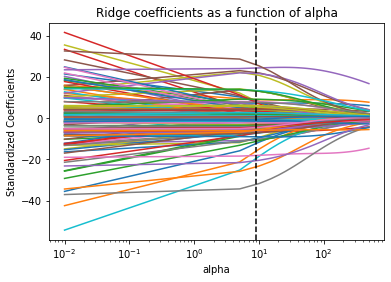

In [50]:
alphas = np.linspace(0.01,500,100)
ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
plt.axvline(
    ridge_model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Ridge coefficients as a function of alpha');

This graph showed that as alpha increases, the penalty increases so that the absolute value of coefficients are approaching zero. The dashline crosses the coefficients of features when the alpha is 16.2975, which is selected by cross validation. The R^2 I got here is 0.439, which means the RidgeCV fits better than Ridge.

### 5.2 Lasso 

##### 5.2.1 Lasso

In [51]:
ls_reg = Lasso(alpha=1)
ls_reg.fit(X_train, y_train)
ls_reg.score(X_test, y_test)

0.3278620174406316

The second model I used is lasso, and I use the default paramter. 
The R^2 is 0.328, and this means roughly 32.8% variations in y_test are explained by variations in X_test.

##### 5.2.2 LassoCV

To find the optimal value of alpha, I used lasso linear model with iterative fitting along a regularization path. I set cv equals to 10. And the R^2 got is 0.301

In [52]:
from sklearn.linear_model import LassoCV

# Lasso with 10 fold cross-validation
lasso_model = LassoCV(cv=10, random_state=0, max_iter=10000)
# Fit model
lasso_model.fit(X_train, y_train)
lasso_model.alpha_

2.294894257124443

In [53]:
lasso_best = Lasso(alpha=lasso_model.alpha_)
# lasso best is the Ridge model selected by cross validation, whose alpha is 4.16285
lasso_best.fit(X_train, y_train)
lasso_best.score(X_test, y_test)

0.3006257716614027

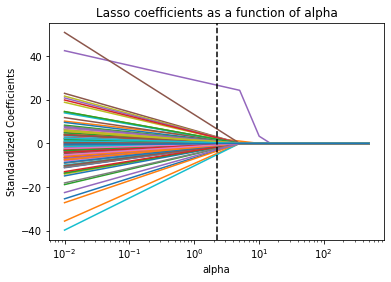

In [54]:
alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
plt.axvline(
    lasso_model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

This graph showed that as alpha increases, the penalty increases so that the absolute value of coefficients are approaching zero. The dashline crosses the coefficients of features when the alpha is 4.1628, which is selected by cross validation. The R^2 I got here is 0.301, which is lower than the R^2 of Lasso model.

### 5.3 OLS

In [55]:
lg_reg = LinearRegression(fit_intercept = False)
lg_reg.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [56]:
lg_reg.score(X_test,y_test)

0.43637267051931916

Then I applied OLS model. 
The R^2 score is 0.436, which means roughly 43.6% variations in y_test are explained by variations in X_test.

### 5.4 Gradient Boosting Regression

In [70]:
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [4,6,8],
    #'max_features': [2, 3],
    #'min_samples_leaf': [3, 4, 5],
    #'min_samples_split': [8, 10, 12],
    'learning_rate':[0.01,0.02,0.03,0.04],
    'n_estimators': [100, 500, 1000,1500]
}

grad_reg = ensemble.GradientBoostingRegressor()
grad_grid_search = GridSearchCV(ensemble.GradientBoostingRegressor(), param_grid,refit = True, verbose = 3)


In [71]:
grad_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] learning_rate=0.01, max_depth=4, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.01, max_depth=4, n_estimators=100, score=0.328, total=   0.7s
[CV] learning_rate=0.01, max_depth=4, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  learning_rate=0.01, max_depth=4, n_estimators=100, score=0.332, total=   0.7s
[CV] learning_rate=0.01, max_depth=4, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV]  learning_rate=0.01, max_depth=4, n_estimators=100, score=0.331, total=   0.7s
[CV] learning_rate=0.01, max_depth=4, n_estimators=100 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=100, score=0.312, total=   0.7s
[CV] learning_rate=0.01, max_depth=4, n_estimators=100 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=100, score=0.308, total=   0.7s
[CV] learning_rate=0.01, max_depth=4, n_estimators=500 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=500, score=0.454, total=   3.4s
[CV] learning_rate=0.01, max_depth=4, n_estimators=500 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=500, score=0.462, total=   3.5s
[CV] learning_rate=0.01, max_depth=4, n_estimators=500 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=500, score=0.446, total=   3.5s
[CV] learning_rate=0.01, max_depth=4, n_estimators=500 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=500, score=0.442, 

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 30.9min finished


GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [100, 500, 1000, 1500]},
             verbose=3)

In [72]:
# print best parameter after tuning
print(grad_grid_search.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grad_grid_search.best_estimator_)

{'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 500}
GradientBoostingRegressor(learning_rate=0.04, max_depth=4, n_estimators=500)


In [79]:
X_test = X_test.drop(columns = 'const')
grad_grid_search.score(X_test, y_test)

0.5137149842185154

# 6 Model Evaluation

## 6.1 Ridge

In [59]:
rg_pred_Y1 = rg_reg.predict(X_test)
print(mean_squared_error(y_test, rg_pred_Y1))
print(mean_absolute_error(y_test, rg_pred_Y1))

1156.3583155539002
27.45250144599973


As for ridge, the mean squared error of ridge regression is 1156.358, which mean the average squared distance between the true price and predicted price is 1156.358. As for the mean absolute error, it says the average distance between the true price and predicted price is 27.452. 

In [60]:
rg_pred_Y2 = ridge_best.predict(X_test)
print(mean_squared_error(y_test, rg_pred_Y2))
print(mean_absolute_error(y_test, rg_pred_Y2))

1003.2329405669346
24.991369816616444


As for ridge_best, the mean squared error of ridge regression is 1003.233, which mean the average squared distance between the true price and predicted price is 1003.233. As for the mean absolute error, it says the average distance between the true price and predicted price is 24.991. 

Next I plot the predicted price distribution with RidgeCV since this model has better R^2 than Ridge.

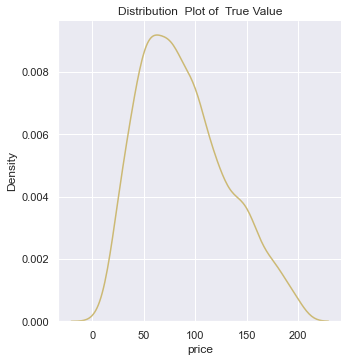

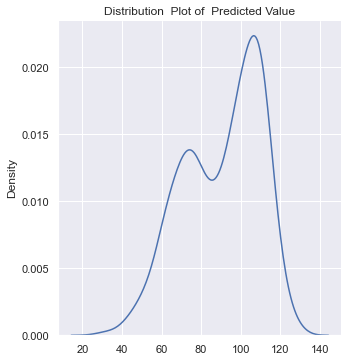

In [61]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
sns.set()
#ax.displot(y_test,kind="kde",color = 'y')
sns.displot(y_test,kind="kde",color = 'y')
plt.title('Distribution  Plot of  True Value')
#ax.displot(rg_pred_Y,kind="kde",color = 'b')
sns.displot(rg_pred_Y1,kind="kde",color = 'b')
plt.title('Distribution  Plot of  Predicted Value')
plt.show()


From the plots we see that the distribution of true price and predicted price have a big difference, especially in terms of the shape, and this echoes with the low R^2 and high MSE. The true y value has a longer right tail while the distribution of predicted values is more like a normal distribution.

## 6.2 Lasso

In [62]:
ls_pred_Y1 = ls_reg.predict(X_test)
print(mean_squared_error(y_test, ls_pred_Y1))
print(mean_absolute_error(y_test, ls_pred_Y1))

1202.552463842935
27.85830225190317


As for ls_reg, the mean squared error of lasso regression is 1202.552, which mean the average squared distance between the true price and predicted price is 1202.552. As for the mean absolute error, it says the average distance between the true price and predicted price is 27.858.

In [63]:
ls_pred_Y2 = lasso_best.predict(X_test)
print(mean_squared_error(y_test, ls_pred_Y2))
print(mean_absolute_error(y_test, ls_pred_Y2))

1251.2820629989392
28.600962405073112


As for lassoCV, the mean squared error of lasso regression is 1251.282, which mean the average squared distance between the true price and predicted price is 1251.282. As for the mean absolute error, it says the average distance between the true price and predicted price is 28.601.

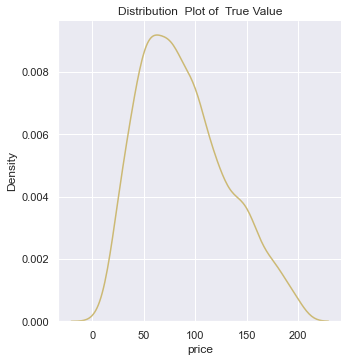

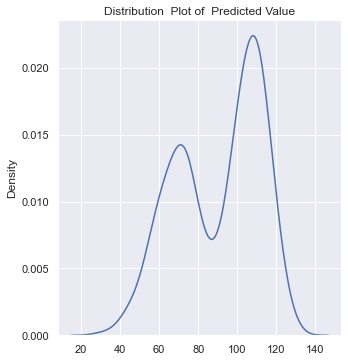

In [64]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
sns.set()
sns.displot(y_test,kind="kde",color = 'y')
plt.title('Distribution  Plot of  True Value')
sns.displot(ls_pred_Y1,kind="kde",color = 'b')
plt.title('Distribution  Plot of  Predicted Value')
plt.show()

In terms of lasso regression, the distribution of true price and predicted price also have a big difference in terms of the shape, and this echoes with the low R^2 and high MSE.

## 6.3 OLS

In [65]:
lg_pred_Y = lg_reg.predict(X_test)
print(mean_squared_error(y_test, lg_pred_Y))
print(mean_absolute_error(y_test,lg_pred_Y))

1008.4111467340542
24.940318522514502


The calculated mean absolute error of OLS is 24.94 and mean squared error is 1008.411, which is pretty large. From these results we know that the model performs not well in prediction, which echoes the relatively low R^2. 

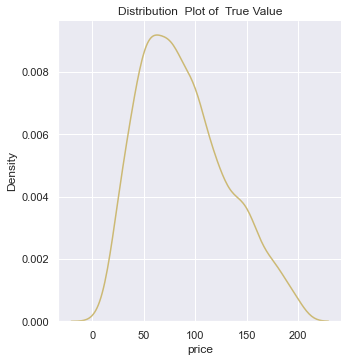

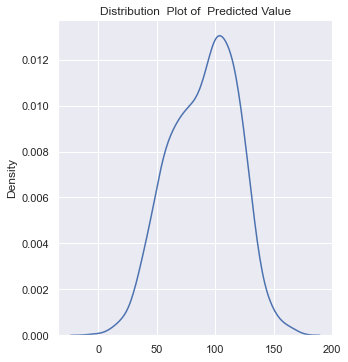

In [66]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
sns.set()
sns.displot(y_test,kind="kde",color = 'y')
plt.title('Distribution  Plot of  True Value')
sns.displot(lg_pred_Y,kind="kde",color = 'b')
plt.title('Distribution  Plot of  Predicted Value')
plt.show()

In terms of OLS, the distribution of true price and predicted price are similar in shape. Both of them are like normal distribution, however, the crests are different. In the true price, the most frequent value is roughly 60, while in predicted price, the most frequent value is roughly 100. 


In [67]:
import statsmodels.api as sm
from scipy import stats
X_test = sm.add_constant(X_test)
y_test_1 = y_test.values.ravel()
model = sm.OLS(y_test_1,X_test)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     9.957
Date:                Sun, 29 May 2022   Prob (F-statistic):          3.34e-113
Time:                        21:24:24   Log-Likelihood:                -6134.9
No. Observations:                1277   AIC:                         1.252e+04
Df Residuals:                    1154   BIC:                         1.315e+04
Df Model:                         122                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             81.8288      6.391     12.803      0.000      69.289      94.369
latitude                          21.5589      9.603      2.245      0.025       2.717      40.400
longitude                         17.0390      4.339      3.927      0.000       8.526      25.552
minimum_nights                    -0.5871      0.963     -0.609      0.542      -2.477       1.303
number_of_reviews                 -6.6913      1.164     -5.749      0.000      -8.975      -4.408
calculated_host_listings_count     0.2015      1.033      0.195      0.845      -1.825       2.228
availability_365                   4.8534      0.937      5.178      0.000       3.014       6.692
index                             -0.0056      0.001     -6.048      0.000      -0.007      -0.004
loc_Albany Park                  -29.6605     18.426     -1.610      0.108     -65.812       6.491
loc_Archer Heights                36.7486     23.661      1.553      0.121      -9.675      83.172
loc_Armour Square                 -0.2597      9.466     -0.027      0.978     -18.832      18.313
loc_Ashburn                       53.0382     36.145      1.467      0.143     -17.880     123.956
loc_Auburn Gresham                38.3731     26.706      1.437      0.151     -14.025      90.771
loc_Austin                         8.4044     12.371      0.679      0.497     -15.868      32.676
loc_Avalon Park                 6.905e-14   6.23e-14      1.109      0.268   -5.31e-14    1.91e-13
loc_Avondale                     -11.1570     13.799     -0.809      0.419     -38.231      15.917
loc_Belmont Cragin                25.0240     22.219      1.126      0.260     -18.570      68.618
loc_Beverly                       30.6091     37.955      0.806      0.420     -43.859     105.077
loc_Bridgeport                    -2.9624      9.184     -0.323      0.747     -20.981      15.056
loc_Brighton Park                  4.0174     12.577      0.319      0.749     -20.658      28.693
loc_Burnside                   -1.254e-13   1.83e-13     -0.684      0.494   -4.85e-13    2.34e-13
loc_Calumet Heights                3.4784     23.748      0.146      0.884     -43.116      50.073
loc_Chatham                      -31.1056     24.344     -1.278      0.202     -78.869      16.658
loc_Chicago Lawn                  10.0992     21.534      0.469      0.639     -32.152      52.350
loc_Clearing                      39.4682     26.545      1.487      0.137     -12.614      91.551
loc_Douglas                        3.8904     10.772      0.361      0.718     -17.244      25.024
loc_Dunning                       -4.3420     20.135     -0.216      0.829     -43.847      35.163
loc_East Garfield Park             3.4910      7.969      0.438      0.661     -12.144      19.126
loc_East Side 

In the OLS model, I checked the significance of features, and loc_Avalon Park, loc_Burnside, loc_Morgan Park, loc_Mount Greenwood, loc_Riverdale, loc_West Elsdon, loc_West Pullman are statistically significant with p-value <= 0.05. 

### 6.4 Gradient Boosting Regression

In [80]:
gd_pred_Y = grad_grid_search.predict(X_test)
print(mean_squared_error(y_test, gd_pred_Y))
print(mean_absolute_error(y_test,gd_pred_Y))

870.0345152809041
22.71801605479322


In terms of Gradient Boosting Regression, the calculated mean absolute error of OLS is 22.718 and mean squared error is 870.034, which is better than lasso, ridge and OLS. 

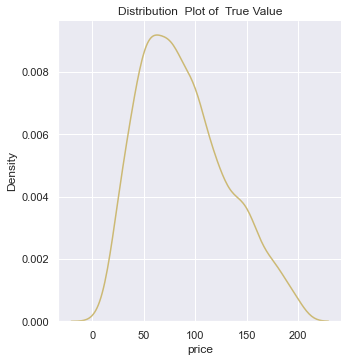

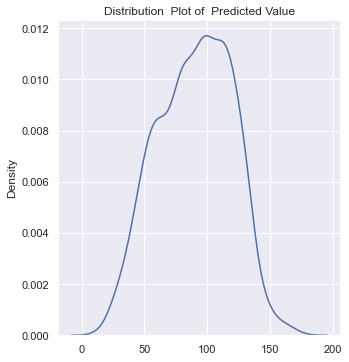

In [81]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
sns.set()
sns.displot(y_test,kind="kde",color = 'y')
plt.title('Distribution  Plot of  True Value')
sns.displot(gd_pred_Y,kind="kde",color = 'b')
plt.title('Distribution  Plot of  Predicted Value')
plt.show()

### 6.5 Model Comparison

In [92]:
dict = {'Model': ['Ridge', 'RidgeCV', 'Lasso', 'LassoCV', 'OLS', 'Gradient Boosting Regression'],
        'R_square': [0.354,0.439,0.328,0.301,0.436,0.514],
        'Mean_square_error': [1156.358,1003.233,1202.552,1251.282,1008.411,870.035],
        'Mean_absolute_error': [27.452,24.991,27.858,28.601,24.940,22.718]}


In [93]:
df = pd.DataFrame (dict)
df

,Model,R_square,Mean_square_error,Mean_absolute_error
0,Ridge,0.354,1156.358,27.452
1,RidgeCV,0.439,1003.233,24.991
2,Lasso,0.328,1202.552,27.858
3,LassoCV,0.301,1251.282,28.601
4,OLS,0.436,1008.411,24.940
5,Gradient Boosting Regression,0.514,870.035,22.718


1) Gradient Boosting Regression has the best R^2 but it still does not match the true price perfectly.  From the distribution of true and predicted price, we can see that the shapes are the same, but the crest are different.

2) We may try different test/train split and the R^2 may change

3) We can also try more parameters in GridSearchCV so that it may return a better model

4) In the data processing part, since the text feature contains too many values, there may still be some unimportant text values existing in the data set. 
